# Previsão de diabetes utilizando o algoritmo de Naive Bayes.

O classificador Naive Bayes é um algoritmo que se baseia nas descobertas de Thomas Bayes para realizar predições em aprendizagem de máquina. A palavra "naive" (ingênuo) refere-se à suposição de que todas as variáveis preditivas são independentes umas das outras, ou seja, a presença de uma característica em particular não está relacionada com a presença de outra característica. Embora essa suposição raramente seja verdadeira no mundo real, o algoritmo ainda funciona bem em muitas aplicações.

Abaixo o teorema de Bayes:

*P (A |B) = P (B | A) x P (A) / P (B)*
Onde:

- P(B|A) significa a probabilidade de B acontecer já que o evento A se confirmou  
- P(A) é a probabilidade de A acontecer
- P(B) é a probabilidade de B acontecer  ntecer

**Objetivo**: A tarefa de previsão é determinar se um determinado paciente está com diabetes baseado nos seus níveis de glicose e pressão arterial.

**Resultados**: O modelo estimado apresentou uma recall de 89% na identificação de pacientes com diabetes com uma precisão de 94%.

In [1]:
# https://scikit-learn.org/stable/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Carregamento dos Dados

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.shape

(995, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB


In [5]:
df.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [6]:
# Não existem valores "Null"
df.isnull().sum()

glucose          0
bloodpressure    0
diabetes         0
dtype: int64

In [7]:
df.describe()

,glucose,bloodpressure,diabetes
count,995.000000,995.000000,995.000000
mean,44.306533,79.184925,0.500503
std,6.707567,9.340204,0.500251
min,20.000000,50.000000,0.000000
25%,40.000000,72.000000,0.000000
50%,45.000000,80.000000,1.000000
75%,50.000000,87.000000,1.000000
max,70.000000,100.000000,1.000000


## Visualização dos dados

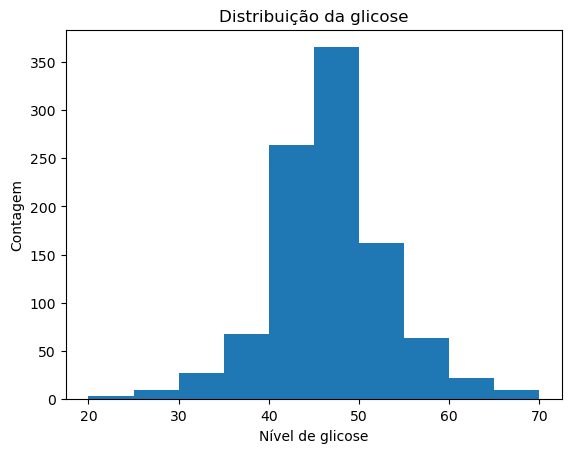

In [8]:
plt.hist(df['glucose'])
plt.title("Distribuição da glicose")
plt.ylabel("Contagem")
plt.xlabel("Nível de glicose")
plt.show()

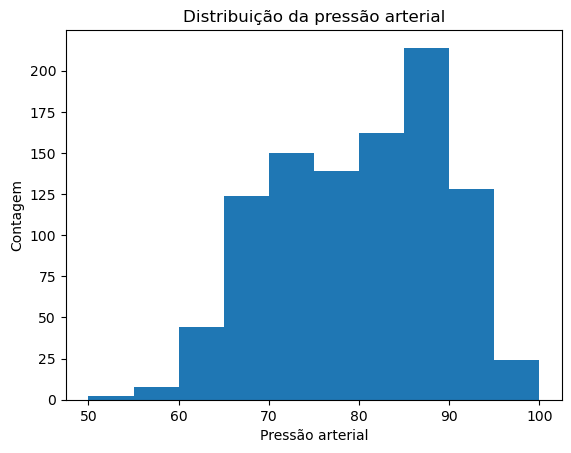

In [9]:
plt.hist(df['bloodpressure'])
plt.title("Distribuição da pressão arterial")
plt.ylabel("Contagem")
plt.xlabel("Pressão arterial")
plt.show()

<Axes: >

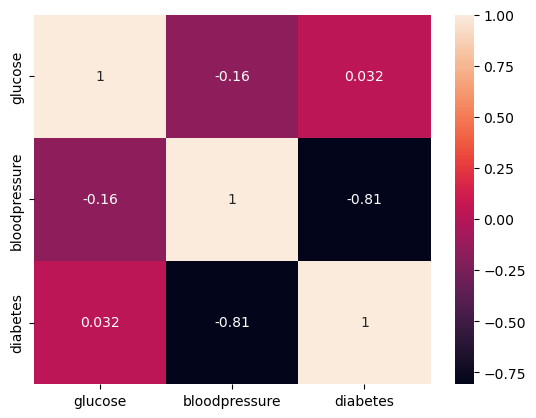

In [10]:
sns.heatmap(df.corr(), annot=True)

## Divisão entre previsores e classes

In [11]:
df.columns

Index(['glucose', 'bloodpressure', 'diabetes'], dtype='object')

In [12]:
X_diabetes = df.iloc[:,0:2].values
X_diabetes

array([[40, 85],
       [40, 92],
       [45, 63],
       ...,
       [40, 83],
       [40, 60],
       [45, 82]], dtype=int64)

In [13]:
y_diabetes = df.iloc[:,2].values
y_diabetes

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,

## Base de dados de treino e de teste

In [14]:
X_diabetes_treinamento, X_diabetes_teste, y_diabetes_treinamento, y_diabetes_teste = train_test_split(X_diabetes, y_diabetes, test_size=0.20, random_state=0)

In [15]:
X_diabetes_treinamento.shape, y_diabetes_treinamento.shape

((796, 2), (796,))

In [16]:
X_diabetes_teste.shape, y_diabetes_teste.shape

((199, 2), (199,))

## Naive Bayes

In [17]:
naive_base_diabetes = GaussianNB()
naive_base_diabetes.fit(X_diabetes_treinamento, y_diabetes_treinamento)

GaussianNB()

In [18]:
previsoes = naive_base_diabetes.predict(X_diabetes_teste)

In [19]:
previsoes

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1], dtype=int64)

In [20]:
accuracy_score(y_diabetes_teste, previsoes)

0.9095477386934674

In [21]:
print(classification_report(y_diabetes_teste, previsoes))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        88
           1       0.94      0.89      0.92       111

    accuracy                           0.91       199
   macro avg       0.91      0.91      0.91       199
weighted avg       0.91      0.91      0.91       199



In [22]:
print(confusion_matrix(y_diabetes_teste, previsoes))

[[82  6]
 [12 99]]
